In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
# delta = w_c - w_q;       w_c = cavity freq., w_q = qubit freq. = 6GHz
# lambda = coupling rate

# Transition: |g, g, 1> --> |e, e, 0>; this happens at w_c ~= 2w_q

# H = H_q + H_c + lambda * X * sum(cos(theta) * sigmax_i + sin(theta) * sigmaz_i)
# H_q = (w_q/2 * sum(sigmaz_i))
# H_c = w_c * adag * a
# X = a + adag

In [29]:
w_q = 6e9;
lambda_ = 0.1 * w_q
theta = np.pi/6
N = 3   # Vector space of photon

w_cq = np.linspace(0.8, 2.2, 5000)
w_c = w_cq * w_q

# Photon
a = tensor(qeye(2), qeye(2), destroy(N))
adag = a.dag()
X = a + adag

# Atom 1
sx1 = tensor(sigmax(), qeye(2), identity(N))
sz1 = tensor(sigmaz(), qeye(2), identity(N))

# Atom 2
sx2 = tensor(qeye(2), sigmax(), identity(N))
sz2 = tensor(qeye(2), sigmaz(), identity(N))

H_q = (w_q/2) * (sz1 + sz2)   # Qubit Hamitonian
idx = 0
evals_mat = np.zeros((len(w_cq),2*2*N))

for wc in w_c:
    H_c = wc * adag * a       # Cavity Hamiltonian
    V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
    H_0 = H_q + H_c + V
    evals, ekets = H_0.eigenstates()
    evals_mat[idx, :] = evals
    idx += 1

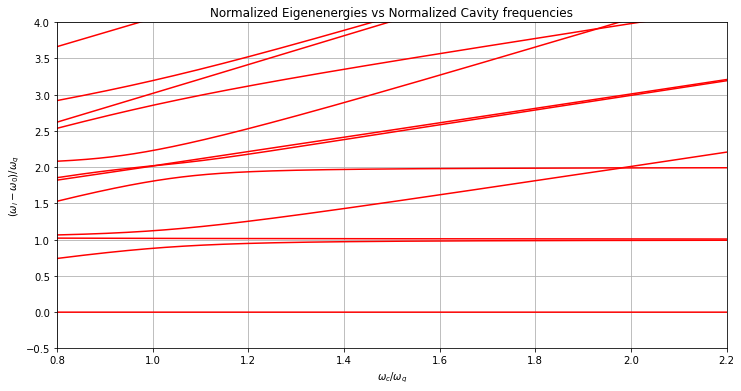

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(2*2*N):
    
    # A plot of normalized eigenenergy differences vs the normalized cavity frequencies
    
    ax.plot(w_cq, (evals_mat[:,n] - evals_mat[:,0])/w_q, 'r')
    
ax.set_xlim(0.8,2.2)
ax.set_ylim(-0.5,4)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

In [31]:
np.shape(evals)

(12,)

In [32]:
np.shape(w_c)

(5000,)

In [33]:
ekets[1]

Quantum object: dims = [[2, 2, 3], [1, 1, 1]], shape = (12, 1), type = ket
Qobj data =
[[-3.82962518e-03]
 [ 3.83027525e-02]
 [-1.01687213e-03]
 [-7.02949342e-01]
 [ 3.74223803e-04]
 [-3.84744113e-03]
 [-7.02949342e-01]
 [ 3.74223803e-04]
 [-3.84744113e-03]
 [-1.01544598e-02]
 [ 1.00456866e-01]
 [ 4.13072517e-03]]

In [34]:
evals_mat.dtype

dtype('float64')

In [35]:
evals_mat[:,3] - evals_mat[:,0]

array([6.39183356e+09, 6.39209776e+09, 6.39236237e+09, ...,
       1.19537411e+10, 1.19537560e+10, 1.19537709e+10])

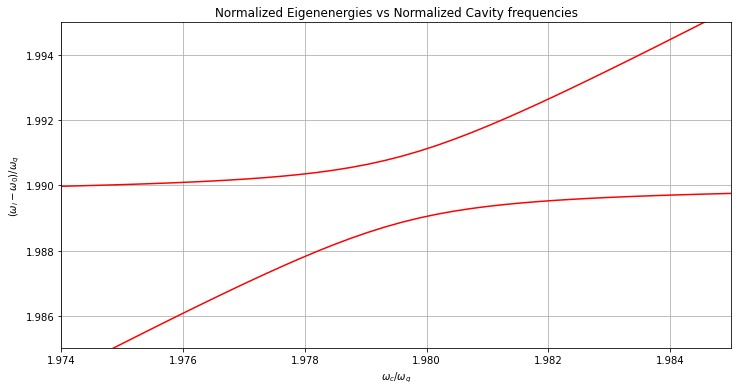

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(2*2*N):
    
    # A plot of normalized eigenenergy differences vs the normalized cavity frequencies
    
    ax.plot(w_cq, (evals_mat[:,n] - evals_mat[:,0])/w_q, 'r')
    
ax.set_xlim(1.974, 1.985)
ax.set_ylim(1.985, 1.995)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

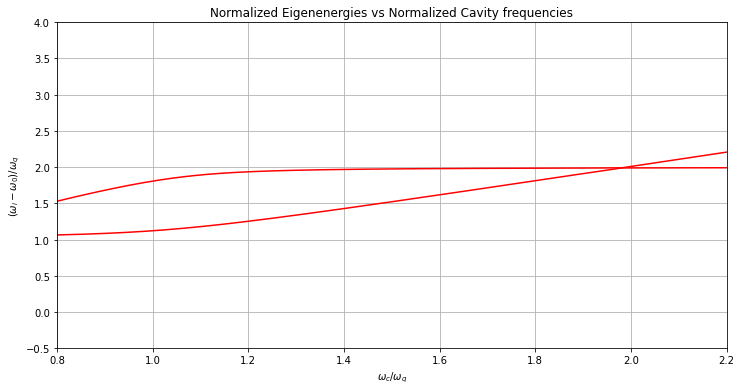

In [37]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(w_cq, (evals_mat[:,3] - evals_mat[:,0])/w_q, 'r')
ax.plot(w_cq, (evals_mat[:,4] - evals_mat[:,0])/w_q, 'r')
    
ax.set_xlim(0.8,2.2)
ax.set_ylim(-0.5,4)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

In [38]:
# Cavity frequency fixed at the point where splitting between |3> and |4> is minimum
# System initialized in |0> = |g,g,0>, an eigenstate of H_0
# System driven by Gaussian pulse with freq w_d = (w_4 + w_3)/2 and Kerr non-linearity

In [79]:
#w_c_min_idx = np.argmin(evals_mat[:,4] - evals_mat[:, 3])
w_c_min_idx = 4210

In [14]:
w_c_min

NameError: name 'w_c_min' is not defined

In [80]:
w_c_min = w_c[w_c_min_idx]      # Cavity frequency set at this minimum splitting
w_30 = evals_mat[w_c_min_idx, 3] - evals_mat[w_c_min_idx, 0]   # Eigenenergy of |3> at min. splitting
w_40 = evals_mat[w_c_min_idx, 4] - evals_mat[w_c_min_idx, 0]   # Eigenenergy of |4> at min. splitting 
w_43 = w_40 - w_30          # Energy difference b/w |3> and |4> at min. splitting
w_d = (w_40 + w_30)/2       # Drive frequency
tau = 1/w_43

In [81]:
H_c = w_c_min * adag * a       # Cavity Hamiltonian
V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
H_K = 0.04 * (adag ** 2) * (a ** 2)
H_0 = H_q + H_c + H_K + V
evals, ekets = H_0.eigenstates()
ekets

array([Quantum object: dims = [[2, 2, 3], [1, 1, 1]], shape = (12, 1), type = ket
       Qobj data =
       [[ 2.98551474e-10]
        [ 0.00000000e+00]
        [ 0.00000000e+00]
        [ 8.58264104e-06]
        [ 0.00000000e+00]
        [ 0.00000000e+00]
        [ 8.58264104e-06]
        [ 0.00000000e+00]
        [ 0.00000000e+00]
        [ 1.00000000e+00]
        [-1.38088137e-08]
        [ 0.00000000e+00]]                                                       ,
       Quantum object: dims = [[2, 2, 3], [1, 1, 1]], shape = (12, 1), type = ket
       Qobj data =
       [[ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [-0.70710678]
        [ 0.        ]
        [ 0.        ]
        [ 0.70710678]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]]                                                           ,
       Quantum object: dims = [[2, 2, 3], [1, 1, 1]], shape = (12, 1), type = ket
       Qobj data =
   

In [42]:
len(evals)

12

In [43]:
ekets[0].dag()

Quantum object: dims = [[1, 1, 1], [2, 2, 3]], shape = (1, 12), type = bra
Qobj data =
[[-2.50556730e-03 -1.62425052e-04 -1.19323457e-03  4.38112443e-03
   2.91726809e-02  1.25948830e-03  4.38112443e-03  2.91726809e-02
   1.25948830e-03 -9.97817908e-01 -5.09408874e-02 -3.61517830e-03]]

In [44]:
# Cavity-photon operators
X = 0

for j in range(len(evals)):
    for k in range(len(evals)):
        if k > j:
            X_jk = ekets[j].dag() * (a + adag) * ekets[k]
            X += X_jk * ekets[j] * ekets[k].dag()

Xdag = X.dag()
            

# Qubit operators

C1 = 0
C2 = 0

sp1 = tensor(sigmap(), qeye(2), qeye(N))
sm1 = tensor(sigmam(), qeye(2), qeye(N))

sp2 = tensor(qeye(2), sigmap(), qeye(N))
sm2 = tensor(qeye(2), sigmam(), qeye(N))

for j in range(len(ekets)):
    for k in range(len(ekets)):
        if k > j:
            C1_jk = ekets[j].dag() * (sm1 + sp1) * ekets[k]
            C2_jk = ekets[j].dag() * (sm2 + sp2) * ekets[k]
            C1 += C1_jk * ekets[j] * ekets[k].dag()
            C2 += C2_jk * ekets[j] * ekets[k].dag()
            
# Photon output flux
Omega_eff = 6e6
times = 2 * np.pi * np.linspace(-0.25, 1, 5000) / Omega_eff
psi_0 = tensor(basis(2), basis(2), fock(N))
options = Options(nsteps = 100000)
flux = mesolve(H_0, psi_0, times, [], e_ops = [Xdag * X], options = options)

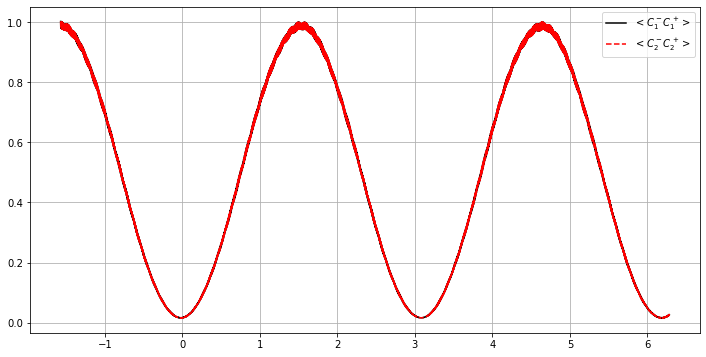

In [45]:
# Qubit excitation dynamics
C1dag = C1.dag()
C2dag = C2.dag()
Q1_exc = mesolve(H_0, psi_0, times, [], e_ops = [C1dag * C1], options = options) # For Qubit 1
Q2_exc = mesolve(H_0, psi_0, times, [], e_ops = [C2dag * C2], options = options) # For Qubit 2
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, Q1_exc.expect[0], 'black', label = '$<C_1^-C_1^+>$')
ax.plot(Omega_eff * times, Q2_exc.expect[0], 'r--', label = '$<C_2^-C_2^+>$')
ax.legend(loc = 'upper right')
ax.grid()

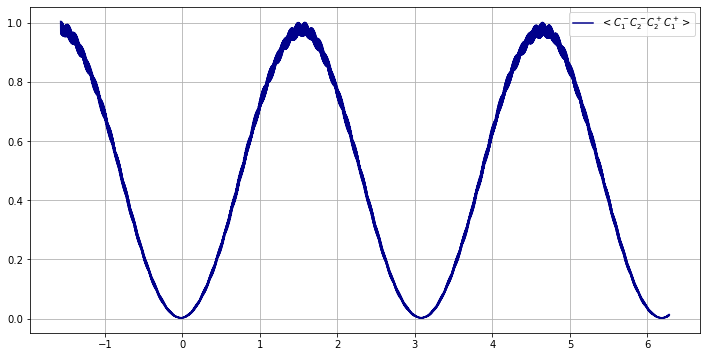

In [46]:
# 2-qubit correlation
G = mesolve(H_0, psi_0, times, [], e_ops = [C1dag*C2dag*C2*C1], options = options)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, G.expect[0], 'darkblue', label = '$<C_1^-C_2^-C_2^+C_1^+>$')
ax.legend(loc = 'upper right')
ax.grid()

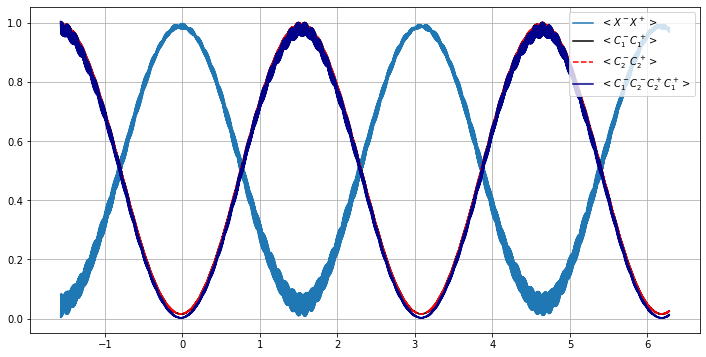

In [47]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.plot(Omega_eff * times, Q1_exc.expect[0], 'black', label = '$<C_1^-C_1^+>$')
ax.plot(Omega_eff * times, Q2_exc.expect[0], 'r--', label = '$<C_2^-C_2^+>$')
ax.plot(Omega_eff * times, G.expect[0], 'darkblue', label = '$<C_1^-C_2^-C_2^+C_1^+>$')
ax.legend(loc = 'upper right')
ax.grid()

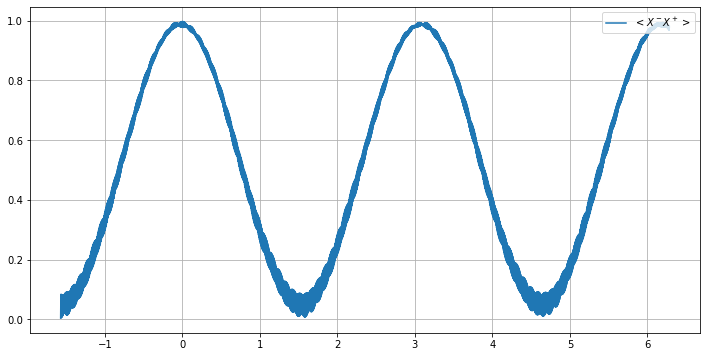

In [48]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.legend(loc = 'upper right')
ax.grid()

In [49]:
def drive(t, args):
    return 5.3 * np.exp(-t*t / (2 * tau * tau)) / (tau * np.sqrt(2 * np.pi)) * np.cos(w_d * t)
    
#    return E * np.cos(args['w_d'] * t)

In [50]:
# Hamiltonian
H_c = w_c_min * adag * a       # Cavity Hamiltonian
V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
H_K = 0.04 * (adag ** 2) * (a ** 2)
H_0 = H_q + H_c + H_K + V
evals, ekets = H_0.eigenstates()

#args = {'A': 5.3, 'tau': tau, 'w_d': w_d}
H = [H_0, [(a + adag), drive]]

# Cavity-photon operators
X = 0

for j in range(len(evals)):
    for k in range(len(evals)):
        if k > j:
            X_jk = ekets[j].dag() * (a + adag) * ekets[k]
            X += X_jk * ekets[j] * ekets[k].dag()

Xdag = X.dag()

for j in range(len(ekets)):
    for k in range(len(ekets)):
        if k > j:
            C1_jk = ekets[j].dag() * (sm1 + sp1) * ekets[k]
            C2_jk = ekets[j].dag() * (sm2 + sp2) * ekets[k]
            C1 += C1_jk * ekets[j] * ekets[k].dag()
            C2 += C2_jk * ekets[j] * ekets[k].dag()
            
C1dag = C1.dag()
C2dag = C2.dag()

# Photon output flux
Omega_eff = 6e6
times = 2 * np.pi * np.linspace(-0.25, 1, 5000) / Omega_eff
psi_0 = tensor(basis(2), basis(2), fock(N))
options = Options(nsteps = 100000)
kappa = 4e-5 * w_q
gamma = 4e-5 * w_q
c_ops = [np.sqrt(kappa) * X, np.sqrt(gamma) * C1 + np.sqrt(gamma) * C2]
e_ops = [Xdag * X, C1dag * C1, C2dag * C2]
flux = mesolve(H, psi_0, times, c_ops = c_ops, e_ops = e_ops, options = options)

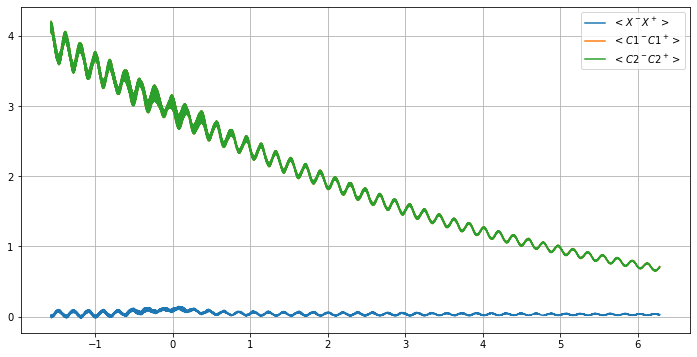

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.plot(Omega_eff * times, flux.expect[1], label = '$<C1^-C1^+>$')
ax.plot(Omega_eff * times, flux.expect[2], label = '$<C2^-C2^+>$')
ax.legend(loc = 'upper right')
ax.grid()

In [41]:
fock(N)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

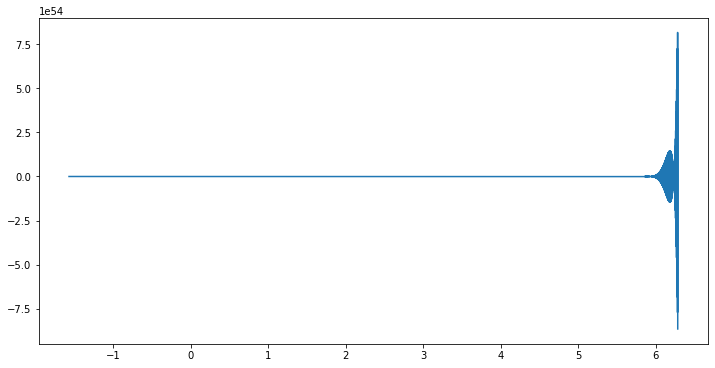

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')

In [46]:
kappa

240000.00000000003

In [47]:
4e-5

4e-05

In [52]:
len(evals)

12

In [82]:
# Hamiltonian
H_c = w_c_min * adag * a       # Cavity Hamiltonian
V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
H_K = 0.04 * (adag ** 2) * (a ** 2)
H_0 = H_q + H_c + H_K + V
evals, ekets = H_0.eigenstates()

#args = {'A': 5.3, 'tau': tau, 'w_d': w_d}
H = [H_0, [(a + adag), drive]]

# Cavity-photon operators
X = 0

for j in range(len(evals)):
    for k in range(3, 5):
        if k > j:
            X_jk = ekets[j].dag() * (a + adag) * ekets[k]
            X += X_jk * ekets[j] * ekets[k].dag()

Xdag = X.dag()
            

# Qubit operators

C1 = 0
C2 = 0

sp1 = tensor(sigmap(), qeye(2), qeye(N))
sm1 = tensor(sigmam(), qeye(2), qeye(N))

sp2 = tensor(qeye(2), sigmap(), qeye(N))
sm2 = tensor(qeye(2), sigmam(), qeye(N))

for j in range(len(ekets)):
    for k in range(len(ekets)):
        if k > j:
            C1_jk = ekets[j].dag() * (sm1 + sp1) * ekets[k]
            C2_jk = ekets[j].dag() * (sm2 + sp2) * ekets[k]
            C1 += C1_jk * ekets[j] * ekets[k].dag()
            C2 += C2_jk * ekets[j] * ekets[k].dag()
            
# Photon output flux
Omega_eff = w_43/2
times = 2 * np.pi * np.linspace(-0.25, 1, 5000) / Omega_eff
psi_0 = tensor(basis(2), basis(2), fock(N))
options = Options(nsteps = 100000)
flux = mesolve(H, psi_0, times, [], e_ops = [Xdag * X], options = options)

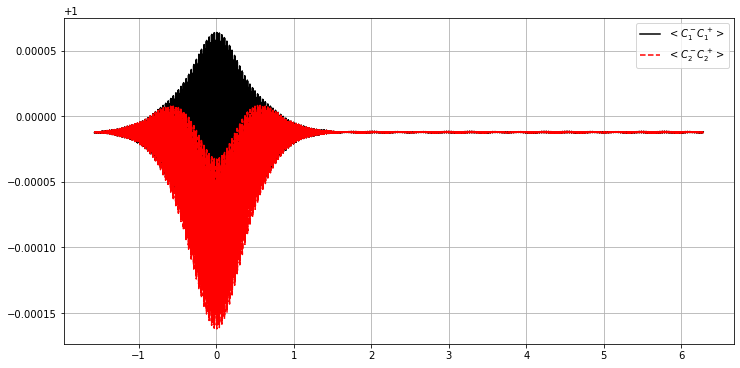

In [83]:
# Qubit excitation dynamics
C1dag = C1.dag()
C2dag = C2.dag()
Q1_exc = mesolve(H, psi_0, times, [], e_ops = [C1dag * C1], options = options) # For Qubit 1
Q2_exc = mesolve(H, psi_0, times, [], e_ops = [C2dag * C2], options = options) # For Qubit 2
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, Q1_exc.expect[0], 'black', label = '$<C_1^-C_1^+>$')
ax.plot(Omega_eff * times, Q2_exc.expect[0], 'r--', label = '$<C_2^-C_2^+>$')
ax.legend(loc = 'upper right')
ax.grid()

C:\Users\bkuch\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


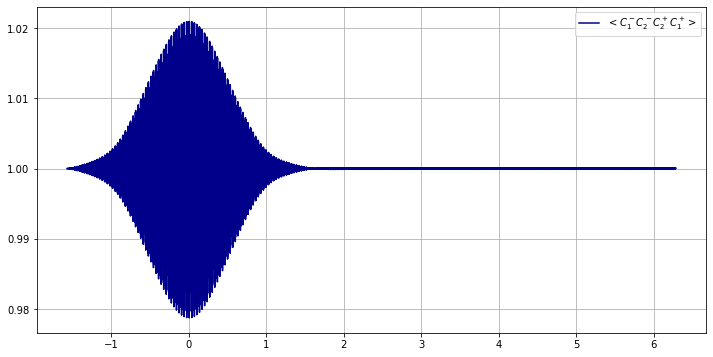

In [84]:
# 2-qubit correlation
G = mesolve(H, psi_0, times, [], e_ops = [C1dag*C2dag*C2*C1], options = options)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, G.expect[0], 'darkblue', label = '$<C_1^-C_2^-C_2^+C_1^+>$')
ax.legend(loc = 'upper right')
ax.grid()

C:\Users\bkuch\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


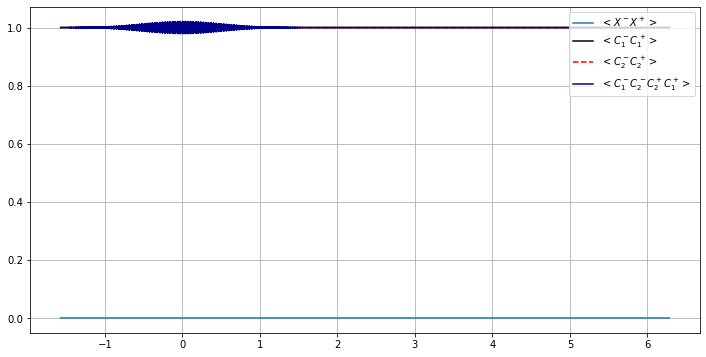

In [85]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.plot(Omega_eff * times, Q1_exc.expect[0], 'black', label = '$<C_1^-C_1^+>$')
ax.plot(Omega_eff * times, Q2_exc.expect[0], 'r--', label = '$<C_2^-C_2^+>$')
ax.plot(Omega_eff * times, G.expect[0], 'darkblue', label = '$<C_1^-C_2^-C_2^+C_1^+>$')
ax.legend(loc = 'upper right')
ax.grid()

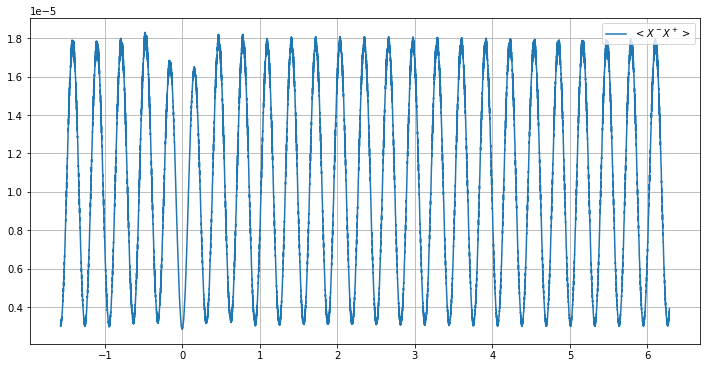

In [86]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.legend(loc = 'upper right')
ax.grid()

In [63]:
w_c_min/w_q

1.979595919183837

In [64]:
w_c[4210]/w_q

1.9790358071614327

In [71]:
sz1

Quantum object: dims = [[2, 2, 3], [2, 2, 3]], shape = (12, 12), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]

In [72]:
5/2*3

7.5

In [73]:
w_43/2

6077998.671205521